# Project One - visualization future stock price/test portfolio


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from datetime import datetime 
import pandas_datareader.data as web
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

style.use('ggplot')

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Pull in data using Yahoo Finance

In [3]:
#Downloading stock infromatino from Yahoo Finance
#aapl_df = yf.download("aapl", start='2016-04-05', end="2021-04-01")
#tsla_df2 = yf.download("tsla", start='2015-03-03', end="2019-04-23")
#amzn_df2 = yf.download("amzn", start='2015-03-03', end="2019-04-23")
#msft_df2 = yf.download("msft", start='2015-03-03', end="2019-04-23")
#goog_df2 = yf.download("goog", start='2015-03-03', end="2019-04-23")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
#aapl_df = aapl_df.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
#tsla_df2 = tsla_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'TSLA'})
#amzn_df2 = amzn_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'AMZN'})
#msft_df2 = msft_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'MSFT'})
#goog_df2 = goog_df2.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'GOOG'})

In [4]:
#Set the start date and end date to pull up to 5 years of data
startdate = '2016-04-05'
today = datetime.today().strftime('%Y-%m-%d')

startdate, today

('2016-04-05', '2021-04-19')

In [5]:
#Choose a stock and pull the stock price via Yahoo using DataReader to test MC simualation on Stock Price
ticker = ('AMZN')
price = web.DataReader(ticker, data_source = 'yahoo', start = startdate, end = today)['Adj Close']


In [6]:
#Display data for the adjusted close price from Yahoo
price

Date
2016-04-05     586.140015
2016-04-06     602.080017
2016-04-07     591.429993
2016-04-08     594.599976
2016-04-11     595.929993
                 ...     
2021-04-13    3400.000000
2021-04-14    3333.000000
2021-04-15    3379.090088
2021-04-16    3399.439941
2021-04-19    3372.010010
Name: Adj Close, Length: 1269, dtype: float64

In [7]:
#Calculate daily return and volatiltiy so these variables can be leveraged for the MC Simulation
daily_return = price.pct_change()
daily_vol = daily_return.std()

#View data to validate the calculation values
daily_return, daily_vol

(Date
 2016-04-05         NaN
 2016-04-06    0.027195
 2016-04-07   -0.017689
 2016-04-08    0.005360
 2016-04-11    0.002237
                 ...   
 2021-04-13    0.006099
 2021-04-14   -0.019706
 2021-04-15    0.013828
 2021-04-16    0.006022
 2021-04-19   -0.008069
 Name: Adj Close, Length: 1269, dtype: float64,
 0.01850968209214241)

In [8]:
#Define a value for last price to leverage in the MC simulation graph
last_price = price[-1]
last_price

3372.010009765625

In [9]:
#Monte Carlo Simulation setup with plan to run 50 scenarios for one year stock price 
num_simu = 500
num_days = 252

#Create DataFrame for simulation
simulation_df = pd.DataFrame()

In [10]:
#Function created for MC daily price similation for one year

for x in range(num_simu):
    count = 0
    daily_vol = daily_return.std()
    
    price_series = []
    
    prices = last_price *(1 + np.random.normal(0, daily_vol))
    price_series.append(prices)
    
    for y in range(num_days):
        if count == 251:
            break
        prices = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(prices)
        count += 1
    
    simulation_df[x] = price_series


simulation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3320.540878,3346.424990,3273.873416,3525.236449,3298.285213,3356.227423,3428.414358,3288.583471,3316.185566,3379.089662,...,3407.051207,3520.621683,3416.456002,3421.166777,3481.437318,3438.047326,3432.408625,3427.280965,3316.449918,3397.139595
1,3382.839608,3249.067492,3295.344907,3527.373524,3308.323435,3271.346410,3367.382348,3332.394612,3285.173342,3466.976280,...,3395.750299,3593.923485,3398.958204,3357.862161,3462.354475,3496.343257,3437.083337,3371.733810,3282.372593,3358.667345
2,3373.863906,3337.534680,3319.102091,3497.474559,3267.136859,3218.170711,3334.362540,3264.325538,3275.909889,3381.201413,...,3419.760179,3623.530477,3428.568071,3397.341215,3501.001182,3435.163804,3485.786252,3324.131941,3272.116599,3280.803904
3,3410.681381,3336.586629,3295.198593,3469.714883,3323.328601,3220.026075,3458.412153,3302.993113,3333.646371,3278.235793,...,3424.656448,3618.993398,3436.538146,3452.703864,3445.190062,3497.056025,3475.207039,3314.540807,3383.893548,3219.845742
4,3430.853854,3381.576295,3328.705186,3498.094921,3286.852118,3286.994953,3523.719202,3223.458452,3212.578182,3284.850861,...,3535.116949,3574.883338,3475.519737,3528.899045,3517.600620,3454.201796,3388.359669,3248.950015,3553.514045,3163.595815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,3315.542949,3269.717110,4607.468820,8541.606139,4366.429429,3305.657438,3798.610401,3497.095709,3008.300420,1794.311495,...,4175.617832,3471.346427,2938.775891,4657.629330,5569.519945,4801.895140,1854.598597,7403.608480,4125.276560,4340.737372
248,3281.186179,3274.850530,4609.131078,8381.574145,4253.796716,3349.117399,3810.712501,3430.458865,3104.020084,1795.944799,...,4247.444520,3350.842091,2961.214304,4572.560284,5633.313280,4841.942599,1876.439048,7494.600551,4237.124930,4321.497010
249,3310.315658,3270.308108,4686.577334,8293.989614,4347.479460,3413.444311,3890.153667,3310.728395,3102.448460,1876.199680,...,4174.703638,3448.731033,3079.216219,4619.442764,5583.318391,4847.605768,1869.125698,7498.840087,4231.014157,4191.017463
250,3307.119995,3313.442976,4721.461685,8290.019482,4286.486176,3413.744454,3875.705343,3258.518160,3190.898780,1862.752997,...,4172.446079,3396.553429,3014.495645,4534.170753,5688.349156,4963.650756,1843.953317,7505.737136,4015.986407,4145.885853


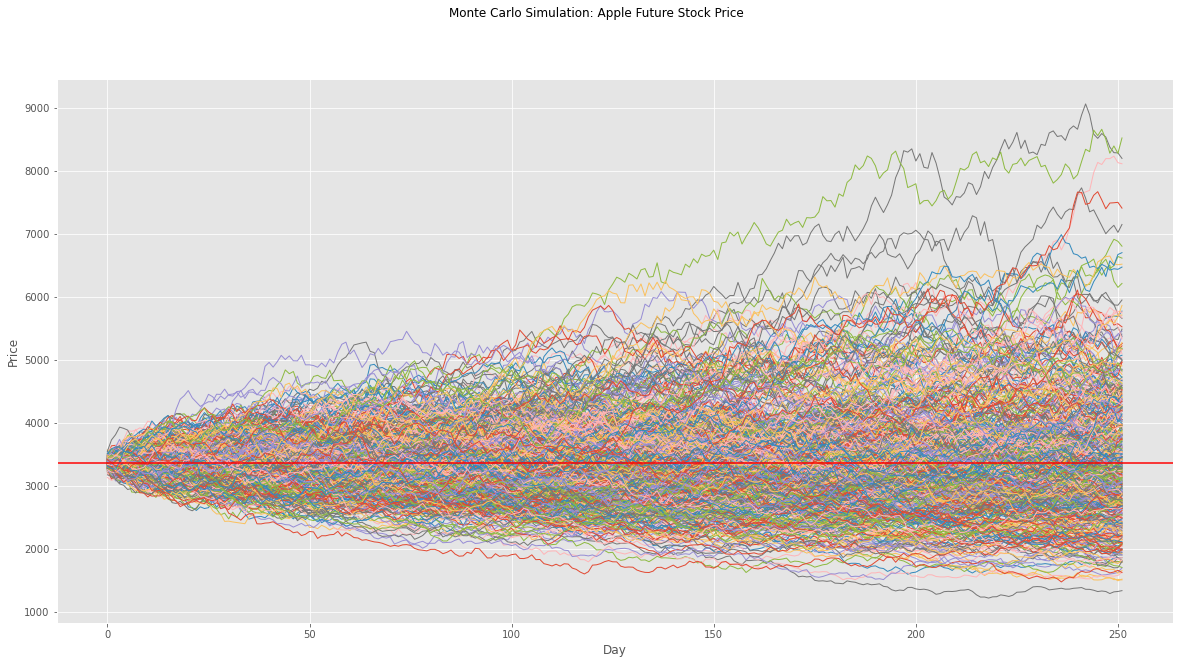

In [11]:
#Graph results to display future price volitity in the model
fig = plt.figure(figsize=(20,10))
fig.suptitle('Monte Carlo Simulation: Apple Future Stock Price')
plt.plot(simulation_df, lw = 1)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [12]:
# Calculate 95% confidence intervals for final cumulative returns
confidence_interval = simulation_df.iloc[-1, :].quantile(q=[0.025, 0.975])

#Calculate and display confidence metrics 
metrics = simulation_df.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
final_stats = metrics.append(ci_series)
final_stats

count            500.000000
mean            3449.042685
std             1080.074683
min             1344.145292
25%             2716.545384
50%             3293.784782
75%             4055.254913
max             8527.144043
95% CI Lower    1819.088105
95% CI Upper    5827.239530
Name: 251, dtype: float64

In [13]:
# Set initial investment on 200 shares of stock in selected stock
initial_shares = 200
initial_investment = round(initial_shares * last_price,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(final_stats[8]*initial_shares,2)
ci_upper = round(final_stats[9]*initial_shares,2)

# Print results
print(f"There is a 95% chance that if you invest ${initial_investment} to purchase {initial_shares} shares in the {ticker}"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that if you invest $674402.0 to purchase 200 shares in the AMZN over the next year will end within in the range of $363817.62 and $1165447.91
